# 1. Random choice
- numpy.random.multivariate_normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np

In [13]:
import warnings 
warnings.filterwarnings('ignore')

For example, we might have an N by D matrix representing N points in D dimensions, such as the following points drawn from a two dimensional normal distribution:

In [4]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

X = np.random.multivariate_normal(mean, cov, 1000)
X.shape
X[0:5]

(1000, 2)

array([[-1.22858241, -2.70100092],
       [-1.42370783, -2.33623321],
       [-1.8709624 , -4.79706472],
       [-0.83325606, -2.95591036],
       [-0.55269958, -0.94271766]])

In [5]:
X[:, :1].mean(); X[:, :1].std()
X[:, 1:2].mean(); X[:, 1:2].std()

0.02069968332267268

1.0159522988422662

0.023959271106582004

2.2510715507679513

Let’s use fancy indexing to select 20 random points.

In [6]:
indices = np.random.choice(X.shape[0], 100, replace=False) 
indices

array([460, 924, 527, 109, 454, 417, 316, 951, 874, 186, 135, 625, 586,
       305, 180,  17, 674, 571, 898, 609, 197, 657, 591, 187,  61, 268,
       499, 261, 199, 718, 292,  70, 438, 687, 648, 222, 598, 134, 623,
       235,  47, 631, 912, 412, 672, 539,  98, 303,   1, 293, 441,  69,
       782, 116,  95, 386, 584, 269, 568,  82, 422, 540, 309,  89, 751,
       800, 497, 472, 132, 767, 809, 567, 620, 712, 954, 112, 592, 509,
       929, 154, 537, 481, 974, 570,  41, 917, 297, 478, 581, 325, 899,
       360, 815,  43, 404, 663,  60, 666,   8, 458])

In [7]:
selection = X[indices] # fancy indexing here
selection.shape

(100, 2)

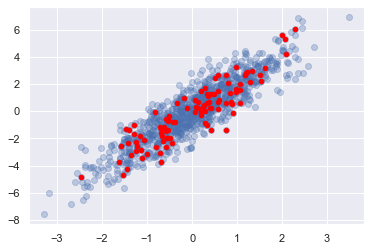

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=20);

# 2. Correlation & covariance matrix
Load the example dataset for Anscombe's quartet

In [9]:
data = sns.load_dataset("anscombe")
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [14]:
data.groupby(['dataset'])['x', 'y'].agg(['mean', 'std'])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

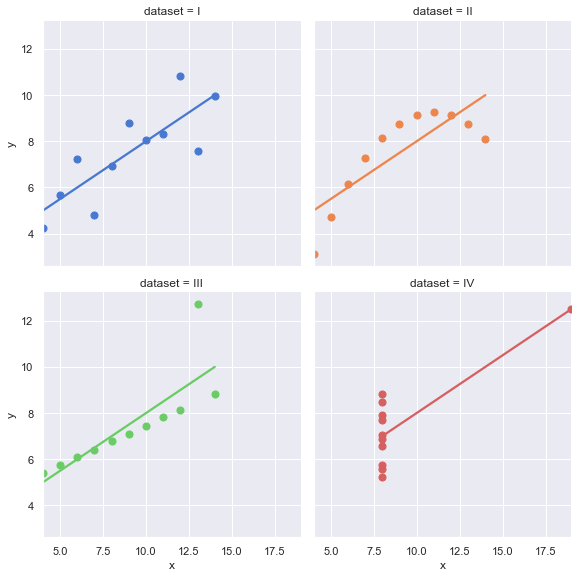

In [15]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [12]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()
df.shape

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(20640, 8)

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>],
       [<AxesSubplot:title={'center':'AveRooms'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>]], dtype=object)

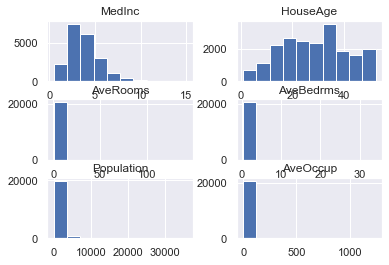

In [15]:
df.hist()

In [16]:
df['MedInc'].std()
df['MedInc'].var()

1.8998217179452732

3.609322559976529

### Mean centering & normalization

In [17]:
MedInc = df['MedInc'].values
MedInc_meancentering = MedInc - MedInc.mean()
MedInc_meancentering.shape

(20640,)

In [18]:
MedInc_meancentering_reshape = MedInc_meancentering.reshape(-1,1)
MedInc_meancentering_reshape.shape
MedInc_meancentering_reshape

(20640, 1)

array([[ 4.454529],
       [ 4.430729],
       [ 3.386729],
       ...,
       [-2.170671],
       [-2.003471],
       [-1.482071]])

### (X - X_mean).Transpose * (X - X_mean),  행렬 (1, 20,640)과 (20,640, 1)의 내적의 값이 (공)분산

In [19]:
np.dot(MedInc_meancentering_reshape.T, MedInc_meancentering_reshape)/len(df)

array([[3.60914769]])

In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [21]:
df.describe().iloc[2,0]**2

3.6093225599765293

In [22]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000


<AxesSubplot:>

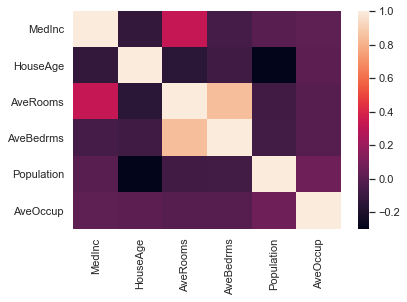

In [23]:
df.corr()
sns.heatmap(df.corr())

In [24]:
for col in df.columns:
    df[col] = (df[col] - df[col].mean())/df[col].std()

In [25]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000


<AxesSubplot:>

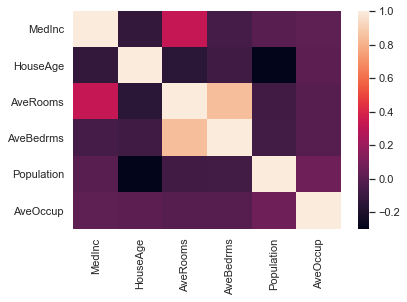

In [26]:
df.corr()
sns.heatmap(df.corr())